**Aimal Dastagirzada**

**220088928**

**MBAN 5110: Midterm Exam**



In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
import numpy as np
import pandas as pd
import matplotlib as mp
import statsmodels.api as sm

from statsmodels.sandbox.regression.gmm import IV2SLS 
# There is a package named IV2SLS in Python. Do not use this package! The exogenous explanatory variables must
# be entered as instruments. So it gives wrong answers
from statsmodels.sandbox.regression.gmm import GMM

**Question 1**

**Update the GMM model that we discussed in class by incorporating the 𝛿 term to the
instrumental-variable moment expressions**

In [2]:
df_1 = pd.read_csv("/Users/aimaldastagirzada/Downloads/midterm_partone.csv")

In [3]:
df_1

,Constant,Stock Change,Inventory Turnover,Operating Profit,Interaction Effect,Current Ratio,Quick Ratio,Debt Asset Ratio
0,1,0.870332,1.795946,0.115846,0.208053,1.672527,0.255171,0.473317
1,1,-0.047347,1.395501,0.436967,0.609788,1.637261,0.221763,0.489967
2,1,0.001176,1.664563,0.541016,0.900555,1.640619,0.189141,0.374269
3,1,-0.901200,1.605738,0.539399,0.866133,1.436221,0.131944,0.224399
4,1,-0.176353,1.591451,0.539938,0.859285,1.433140,0.183095,0.213446
...,...,...,...,...,...,...,...,...
1691,1,-0.015543,5.225766,0.309119,1.615384,3.554503,2.197871,0.005549
1692,1,0.399089,5.324390,0.274782,1.463044,3.745006,2.324502,0.004359
1693,1,-0.702200,5.575258,0.287503,1.602905,3.434909,2.282626,0.000000
1694,1,0.283926,5.423463,0.256657,1.391968,2.876645,1.454948,0.000000


In [4]:
y_vals  = np.array(df_1["Stock Change"])
x_vals  = np.array(df_1[["Inventory Turnover","Operating Profit","Interaction Effect"]])
iv_vals = np.array(df_1[["Current Ratio","Quick Ratio","Debt Asset Ratio"]])

class gmm(GMM):
    def momcond(self, params):
        p0, p1, p2, p3 = params
        endog = self.endog
        exog = self.exog
        inst = self.instrument   

        error0 = endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]
        error1 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,1]
        error2 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,2]
        error3 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,0] 
        error4 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,1] 
        error5 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,2] 
 
        g = np.column_stack((error0, error1, error2, error3, error4, error5))
        return g


beta0 = np.array([0.1, 0.1, 0.1, 0.1])
res = gmm(endog = y_vals, exog = x_vals, instrument = iv_vals, k_moms=6, k_params=4).fit(beta0)

res.summary()

Optimization terminated successfully.
         Current function value: 0.000046
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000373
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 gmm Results                                  
==============================================================================
Dep. Variable:                      y   Hansen J:                       0.6317
Model:                            gmm   Prob (Hansen J):                 0.729
Method:                           GMM                                         
Date:                Sun, 12 Nov 2023                                         
Time:                        16:42:35                                         
No. Observations:                1696                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0           -0.0200      0.021     -0.964      0.335      -0.061       0.021
p 1            0.0011      0.001      1.843      0.065   -6.89e-05       0.002
p 2           -0.1071      0.032     -3.370      0.001      -0.169      -0.045
p 3            0.0011      0.000      2.760      0.006       0.000       0.002
==============================================================================
"""

In [5]:
import numpy as np
import pandas as pd

# Assuming df_1 is your DataFrame
y_vals = np.array(df_1["Stock Change"])
x_vals = np.array(df_1[["Inventory Turnover", "Operating Profit", "Interaction Effect"]])
iv_vals = np.array(df_1[["Current Ratio", "Quick Ratio", "Debt Asset Ratio"]])

class gmm(GMM):
    def momcond(self, params):
        p0, p1, p2, p3, delta = params  # Add delta as a parameter
        endog = self.endog
        exog = self.exog
        inst = self.instrument

        # Update instrumental-variable moment expressions with 𝛿 term
        delta_term = delta * np.ones_like(endog)
        error0 = endog - p0 - p1 * exog[:, 0] - p2 * exog[:, 1] - p3 * exog[:, 2] - delta_term
        error1 = (endog - p0 - p1 * exog[:, 0] - p2 * exog[:, 1] - p3 * exog[:, 2]) * exog[:, 1]
        error2 = (endog - p0 - p1 * exog[:, 0] - p2 * exog[:, 1] - p3 * exog[:, 2]) * exog[:, 2]
        error3 = (endog - p0 - p1 * exog[:, 0] - p2 * exog[:, 1] - p3 * exog[:, 2]) * inst[:, 0]
        error4 = (endog - p0 - p1 * exog[:, 0] - p2 * exog[:, 1] - p3 * exog[:, 2]) * inst[:, 1]
        error5 = (endog - p0 - p1 * exog[:, 0] - p2 * exog[:, 1] - p3 * exog[:, 2]) * inst[:, 2]

        g = np.column_stack((error0, error1, error2, error3, error4, error5))
        return g

# Initial values for parameters, including delta
beta0 = np.array([0.1, 0.1, 0.1, 0.1, 0.1])

# Fit the model with the updated moment conditions
res = gmm(endog=y_vals, exog=x_vals, instrument=iv_vals, k_moms=6, k_params=5).fit(beta0)

# Display the summary of the results
res.summary()


Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000202
         Iterations: 7
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000202
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000202
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 gmm Results                                  
==============================================================================
Dep. Variable:                      y   Hansen J:                       0.3424
Model:                            gmm   Prob (Hansen J):                 0.558
Method:                           GMM                                         
Date:                Sun, 12 Nov 2023                                         
Time:                        16:42:35                                         
No. Observations:                1696                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0           -0.0201      0.021     -0.965      0.334      -0.061       0.021
p 1            0.0009      0.001      1.259      0.208      -0.000       0.002
p 2           -0.1051      0.032     -3.284      0.001      -0.168      -0.042
p 3            0.0012      0.000      2.801      0.005       0.000       0.002
p 4            0.0047      0.009      0.538      0.590      -0.012       0.022
==============================================================================
"""

**Question 2**

In [6]:
df= pd.read_csv("/Users/aimaldastagirzada/Downloads/midterm_parttwo.csv")

In [7]:
df

,Years of Education after High School,Requested Credit Amount,Number of Dependents,Monthly Income,Monthly Expense,Marital Status,Credit Rating
0,1,Low,No dependent,Very low,Very low,Married,Positive
1,2,Low,No dependent,Very low,Very low,Single,Positive
2,1,Low,No dependent,Very low,Very low,Single,Positive
3,3,Low,No dependent,Very low,Very low,Married,Positive
4,3,Low,No dependent,Very low,Very low,Single,Negative
...,...,...,...,...,...,...,...
8076,3,Low,Less than 2,Very High,Very high,Married,Positive
8077,3,Medium,Less than 2,Very High,Very high,Married,Negative
8078,3,Medium,More than 2,Very High,Very high,Married,Positive
8079,7,Medium,Less than 2,Very High,Very high,Married,Positive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Years of Education after High School  8081 non-null   int64 
 1   Requested Credit Amount               8081 non-null   object
 2   Number of Dependents                  8081 non-null   object
 3   Monthly Income                        8081 non-null   object
 4   Monthly Expense                       8081 non-null   object
 5   Marital Status                        8081 non-null   object
 6   Credit Rating                         8081 non-null   object
dtypes: int64(1), object(6)
memory usage: 442.1+ KB


In [9]:
df.describe(include='all')

,Years of Education after High School,Requested Credit Amount,Number of Dependents,Monthly Income,Monthly Expense,Marital Status,Credit Rating
count,8081.000000,8081,8081,8081,8081,8081,8081
unique,NaN,3,3,5,5,3,2
top,NaN,Low,Less than 2,Very low,Very low,Married,Positive
freq,NaN,5442,3616,3183,6243,5876,6935
mean,2.608588,NaN,NaN,NaN,NaN,NaN,NaN
std,1.571835,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def credit_ratings (x):
    if x=='Positive':
        return 1
    elif x=='Negative':
        return 0
    

In [11]:
df['Credit Rating'] =df['Credit Rating'].apply(credit_ratings)

In [12]:
df

,Years of Education after High School,Requested Credit Amount,Number of Dependents,Monthly Income,Monthly Expense,Marital Status,Credit Rating
0,1,Low,No dependent,Very low,Very low,Married,1
1,2,Low,No dependent,Very low,Very low,Single,1
2,1,Low,No dependent,Very low,Very low,Single,1
3,3,Low,No dependent,Very low,Very low,Married,1
4,3,Low,No dependent,Very low,Very low,Single,0
...,...,...,...,...,...,...,...
8076,3,Low,Less than 2,Very High,Very high,Married,1
8077,3,Medium,Less than 2,Very High,Very high,Married,0
8078,3,Medium,More than 2,Very High,Very high,Married,1
8079,7,Medium,Less than 2,Very High,Very high,Married,1


In [13]:
df['Marital Status'].unique()

array(['Married', 'Single', 'Not specified'], dtype=object)

In [14]:
df.columns

Index(['Years of Education after High School', 'Requested Credit Amount',
       'Number of Dependents', 'Monthly Income', 'Monthly Expense',
       'Marital Status', 'Credit Rating'],
      dtype='object')

In [15]:
cat_cols = ['Requested Credit Amount','Number of Dependents', 'Monthly Income', 'Monthly Expense','Marital Status']
num_cols = ['Years of Education after High School']

In [16]:
target = ['Credit Rating']

In [17]:
X = df[cat_cols+num_cols]
y = df[target]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5, random_state=1234)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [20]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [21]:
model = LogisticRegression()

In [22]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_cols),
                                                 ('num', num_transformer, num_cols)])

In [23]:
log_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', model)
])

In [24]:
log_pipeline.fit(X_train, y_train)


/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Requested Credit Amount',
                                                   'Number of Dependents',
                                                   'Monthly Income',
                                                   'Monthly Expense',
                                                   'Marital Status']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Years of Education after '
                                                   'High School'])])),
                ('classifier', LogisticRegression())])

In [25]:
pred_log= log_pipeline.predict(X_test)

In [26]:
print(f1_score(pred_log, y_test))

0.9239781653574758


In [27]:
print(recall_score(pred_log, y_test))

0.8586983419945559


In [28]:
print(accuracy_score(pred_log,y_test))

0.8586983419945559


In [29]:
print(confusion_matrix(pred_log,y_test))

[[   0    0]
 [ 571 3470]]


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

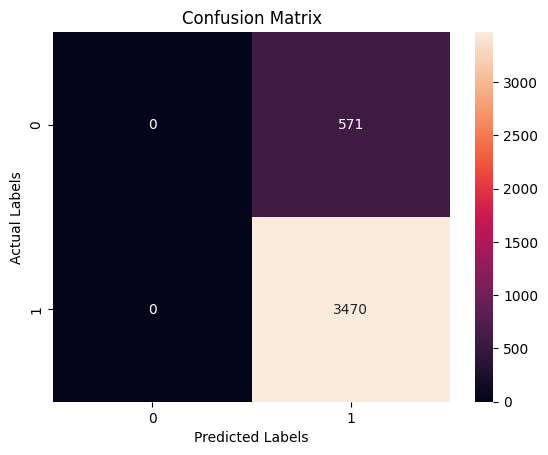

In [31]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_log)

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')

# Add labels to the x-axis and y-axis
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

# Add a title to the heatmap
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

In [32]:
probabilities = log_pipeline.predict_proba(X_test)[:, 1]


In [33]:
threshold = np.percentile(probabilities, 85)


In [34]:
y_pred_custom_threshold = (probabilities > threshold).astype(int)


In [35]:
conf_matrix_custom_threshold = confusion_matrix(y_test, y_pred_custom_threshold)
recall_custom_threshold = recall_score(y_test, y_pred_custom_threshold)
precision_custom_threshold = precision_score(y_test, y_pred_custom_threshold)
f1_custom_threshold = f1_score(y_test, y_pred_custom_threshold)


In [36]:
print("Confusion Matrix (Custom Threshold):\n", conf_matrix_custom_threshold)
print("Recall (Custom Threshold): ", recall_custom_threshold)
print("Precision (Custom Threshold): ", precision_custom_threshold)
print("F1 Score (Custom Threshold): ", f1_custom_threshold)

Confusion Matrix (Custom Threshold):
 [[ 491   80]
 [2973  497]]
Recall (Custom Threshold):  0.14322766570605186
Precision (Custom Threshold):  0.8613518197573656
F1 Score (Custom Threshold):  0.24561403508771926


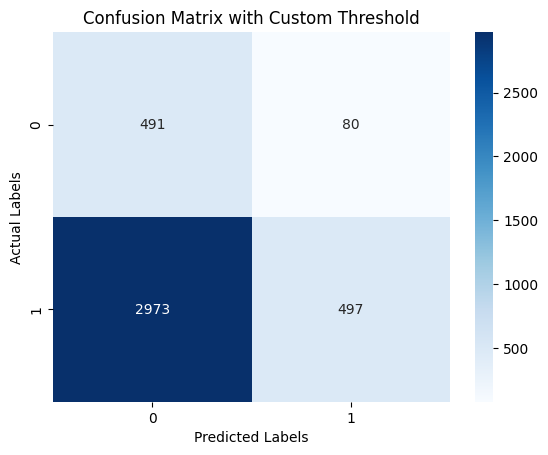

In [37]:
# Calculate the confusion matrix with the custom threshold
conf_matrix_custom_threshold = confusion_matrix(y_test, y_pred_custom_threshold)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix_custom_threshold, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix with Custom Threshold')

# Display the heatmap
plt.show()

In [38]:
import os

os.system('jupyter nbconvert --to html MBAN_midterm.ipynb')

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'MBAN_midterm.ipynb' matched no files


65280